# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

Загрузим данные

In [164]:
data=pd.read_csv('adult.data',header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"],skipinitialspace=True) 

Посмотрим на данные

In [165]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

Мы знаем, что если и есть у признака пропуски, то они обозначены как '?'

Посмотрим, есть ли пропуски по этому признаку

In [219]:
len(data[data["sex"]=='?'])

0

In [220]:
men=data[data["sex"]=='Male']
print('мужчин в выборке',len(men))

мужчин в выборке 21790


In [227]:
women=data[data["sex"]=='Female']
print('женщин в выборке', len(women))

женщин в выборке 10771


### Вопрос 2
Каков средний возраст мужчин?


Посмотрим, какие значения принимает этот признак, есть ли пропуски:

In [169]:
men["age"].unique()

array([39, 50, 38, 53, 52, 42, 37, 30, 32, 40, 34, 25, 35, 43, 56, 19, 54,
       49, 23, 20, 45, 22, 48, 21, 31, 24, 57, 41, 29, 47, 46, 36, 79, 27,
       67, 18, 59, 33, 76, 44, 55, 61, 70, 64, 71, 28, 51, 58, 60, 90, 66,
       17, 26, 65, 77, 63, 62, 80, 72, 68, 73, 81, 88, 75, 69, 74, 78, 82,
       84, 83, 85, 87])

а теперь просто возьмем среднее)

In [170]:
men['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

Посмотрим, какие страны представлены в датасете

In [171]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

Заметим, что для этого признака есть пропуски, избавимся от них, чтобы посчитать долю на множестве объектов, у которых известен данный признак.

In [172]:
data_new=data[data["native-country"]!='?']

Посчитаем долю для измененного датасета

In [173]:
len(data_new[data_new["native-country"]=='United-States'])/len(data_new)

0.91218963037088

Как видим почти все люди, представленные в датасете из США

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

Посмотрим, какие значения принимает данный признак

In [192]:
list(data['education'].unique())

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

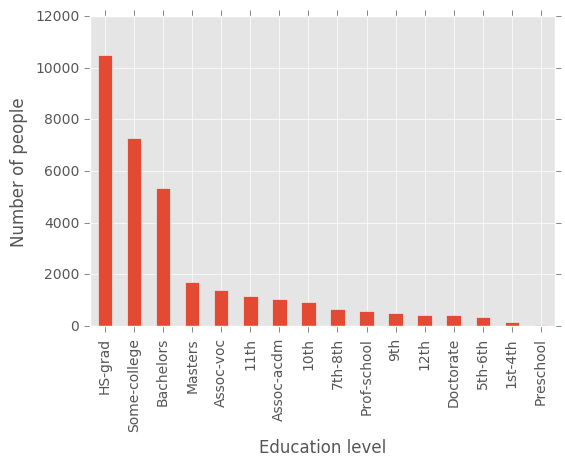

In [218]:
data['education'].value_counts().plot(kind='bar')
plt.xlabel('Education level')
plt.ylabel('Number of people')

Как видим, подавляющее число людей имеют образование не выше бакалавриата. Можно предположить, что число людей в зависимости от уровня образования распределено экспоненциально. 

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Посмотрим, какие значения принимает данный признак

In [42]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

Пропусков здесь нет

In [115]:
print('среднее переменной "final weight" (fnlwgt) для разведённых людей равно',data[data['marital-status']=='Divorced']['fnlwgt'].mean())

среднее переменной "final weight" (fnlwgt) для разведённых людей равно 185802.79045689848


In [117]:
print('стандартное отклонение "final weight" (fnlwgt) для разведённых людей равно',data[data['marital-status']=='Divorced']['fnlwgt'].std())

стандартное отклонение "final weight" (fnlwgt) для разведённых людей равно 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [49]:
data['50K'].unique()

array(['<=50K', '>50K'], dtype=object)

Составим датафрейм состоящий только из тех объектов, признак '50K' у которых принимает значение '>50K'.

In [53]:
rich=data[data['50K']=='>50K']

In [54]:
rich['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th', '10th',
       '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

Посчитаем долю людей, имеющих высшее образование на основе нового датафрейма (за высшее образование принимаем бакалавриат, магистратуру и докторат)

In [63]:
(len(rich[rich['education']=='Bachelors'])+len(rich[rich['education']=='Masters'])+len(rich[rich['education']=='Doctorate']))/len(rich)

0.4445861497258003

Получаем, что больше половины среди тех, кто зарабатывает более 50 тыс. не имеют высшего образования => нет, утверждение неверно

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [67]:
races=list(data['race'].unique())
races

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

In [74]:
white=data[data['race']==races[0]]
black=data[data['race']==races[1]]
islander=data[data['race']==races[2]]
eskimo=data[data['race']==races[3]]
other=data[data['race']==races[4]]              

In [80]:
print('Максимальный рост среди белых мужчин равен',white[white['sex']=='Male']['age'].max())
print('Максимальный рост среди белых женщин равен',white[white['sex']=='Female']['age'].max())
print('Максимальный рост среди черных мужчин равен',black[black['sex']=='Male']['age'].max())
print('Максимальный рост среди черных женщин равен',black[black['sex']=='Female']['age'].max())
print('Максимальный рост среди азиатских мужчин равен',islander[islander['sex']=='Male']['age'].max())
print('Максимальный рост среди азиатских женщин равен',islander[islander['sex']=='Female']['age'].max())
print('Максимальный рост среди индейских мужчин равен',eskimo[eskimo['sex']=='Male']['age'].max())
print('Максимальный рост среди индейских женщин равен',eskimo[eskimo['sex']=='Female']['age'].max())
print('Максимальный рост среди мужчин других наций равен',other[other['sex']=='Male']['age'].max())
print('Максимальный рост среди женщин других наций равен',other[other['sex']=='Female']['age'].max())

Максимальный рост среди белых мужчин равен 90
Максимальный рост среди белых женщин равен 90
Максимальный рост среди черных мужчин равен 90
Максимальный рост среди черных женщин равен 90
Максимальный рост среди азиатских мужчин равен 90
Максимальный рост среди азиатских женщин равен 75
Максимальный рост среди индейских мужчин равен 82
Максимальный рост среди индейских женщин равен 80
Максимальный рост среди мужчин других наций равен 77
Максимальный рост среди женщин других наций равен 74


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [81]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Представим данные страны в виде списка и уберем пропущенное значение '?' из него.

In [90]:
Farm_Fish=data[data['occupation']=='Farming-fishing']
lands=list(Farm_Fish['native-country'].unique())
lands.remove('?')
print('Фермеры/рыбаки присутствуют в странах',lands)

Фермеры/рыбаки присутствуют в странах ['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico', 'England', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam', 'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal', 'El-Salvador', 'Hong', 'Ireland', 'France']


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


1) Посчитаем количество мужчин-бакалавров к количеству мужчин-магистров

In [93]:
print('для мужчин соотношение равно',len(men[men['education']=='Bachelors'])/len(men[men['education']=='Masters']))

для мужчин соотношение равно 3.14743049705139


2) Посчитаем количество женщин-бакалавров к количеству женщин-магистров

In [94]:
print('для женщин соотношение равно',len(women[women['education']=='Bachelors'])/len(women[women['education']=='Masters']))

для женщин соотношение равно 3.0205223880597014


Среди мужчин отношение числа бакалавров к числу магистров выше, чем среди женщин

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

1)

In [95]:
print('Максимальное количество рабочих часов в неделю равно',data['hours-per-week'].max())

Максимальное количество рабочих часов в неделю равно 99


2)

In [102]:
print('99 часов в неделю работают',len(data[data['hours-per-week']==99]),'человек')

99 часов в неделю работают 85 человек


3)

In [113]:
hard_workers=data[data['hours-per-week']==99]
print('число рабочих, чей заработок больше 50 тысяч равно',len(hard_workers[hard_workers['50K']=='>50K']))
print('число рабочих, чей заработок меньше либо равен 50 тысяч равно',len(hard_workers[hard_workers['50K']=='<=50K']))

число рабочих, чей заработок больше 50 тысяч равно 25
число рабочих, чей заработок меньше либо равен 50 тысяч равно 60
